# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

This project aims to build a model that can predict the difficulty level of a French text for English speakers. The difficulty level is based on the Common European Framework of Reference for Languages (CEFR) scale, which ranges from A1 to C2. The goal is to use this model in a recommendation system to suggest texts that are appropriate for a given language level. For example, if someone is at an A1 French level, it would not be helpful to recommend a text at a B2 level, as it would likely be too difficult for them to understand. On the other hand, a text that is slightly above their current level and contains some unknown words can help them improve their language skills.



## **Let's take a look at the data !**

In [1]:
# importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

This is the data on which to train our models.

In [2]:
df = pd.read_csv('training_data.csv')
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [3]:
df.shape

(4800, 3)

Have a look at the data on which to make predictions.

In [4]:
df_pred = pd.read_csv('unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for submissions.

In [5]:
df_example_submission = pd.read_csv('sample_submission.csv')
df_example_submission.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


## **Train the models**

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### **Baseline**
What is the baseline for this classification problem?

In [77]:
# import additional packages
import string

# importing specific libraries
from sklearn.dummy import DummyClassifier

In [78]:
# set random_state
np.random.seed = 0

In [79]:
# the features we want to analyze
X = df['sentence']
# the labels we want to test against
ylabels = df['difficulty']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=0)

In [80]:
X_train

70                                Comment t'appelles-tu ?
4347    Voilà qui serait en effet de nature à simplifi...
1122    Les pèlerins partagèrent alors cette célébrati...
4570                          Qu'est-ce que vous faites ?
34      En voici un des moins obscurs : "Plus nous dev...
                              ...                        
1033    Les micro-changements apportés par ce type d'u...
3264    J'allais à la poste quand j'ai croisé ma cousi...
1653    Au cours des années 1970 et 1980, plusieurs gr...
2607    Stop : tout d'abord, figurez-vous que les vrai...
2732    "On s'est alors dit que le terrain commençait ...
Name: sentence, Length: 3840, dtype: object

In [81]:
y_train

70      A1
4347    B2
1122    C1
4570    A1
34      C2
        ..
1033    B2
3264    A2
1653    C1
2607    B2
2732    B1
Name: difficulty, Length: 3840, dtype: object

In [82]:
# instantiate with the "most frequent" parameter
dummy = DummyClassifier(strategy='most_frequent')

# fit it as if we had no X features to train it on
dummy.fit(None, y_train)

# compute test baseline and store it for later
baseline = dummy.score(None, y_train)
print(f"The baseline is {baseline:.4f}")

The baseline is 0.1698


In [83]:
# displays the distribution
y_train.value_counts(normalize=True)

A1    0.169792
C2    0.169010
B2    0.168750
B1    0.165365
A2    0.164323
C1    0.162760
Name: difficulty, dtype: float64

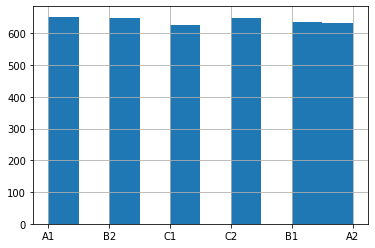

In [84]:
y_train.hist()

#### **Logistic Regression** (without data cleaning)
Train a simple logistic regression model using a Tfidf vectoriser.

In [85]:
# import additional packages 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [86]:
# create pipeline
pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                 ('classifier', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=500))
                 ])

# fit model on training set
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

Calculate accuracy, precision, recall and F1 score on the test set.

In [87]:
# evaluate the model
print(metrics.classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

          A1     0.5284    0.5776    0.5519       161
          A2     0.4082    0.3659    0.3859       164
          B1     0.4324    0.4000    0.4156       160
          B2     0.4258    0.4583    0.4415       144
          C1     0.5105    0.4220    0.4620       173
          C2     0.4817    0.5823    0.5272       158

    accuracy                         0.4667       960
   macro avg     0.4645    0.4677    0.4640       960
weighted avg     0.4656    0.4667    0.4640       960



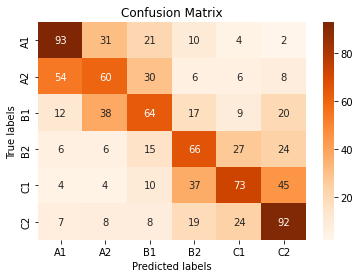

In [88]:
# creates a subplot and displays a heatmap of the confusion matrix
ax= plt.subplot()
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.5g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2']); ax.yaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2']);

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [89]:
# which A1 level sentences are classified C2 level in test set?
for input, prediction, label in zip (X_test, y_pred, y_test):
  if prediction != label and prediction == 'C2' and label == 'A1':
    print(input, 'has been classified as', prediction, 'and should be', label)

Un rêve d'enfant réalisé. has been classified as C2 and should be A1
Il suffit de rester 30 minutes dans la cabine LIRVA pour être capable de se débrouiller dans toutes les situations de la vie quotidienne et dans la langue de son choix. has been classified as C2 and should be A1


Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [90]:
# predictions for unseen values
numpy_array = pipe.predict(df_pred['sentence'])

# convert array to dataframe
df_pred_TESTsubmission = pd.DataFrame(numpy_array,columns=['difficulty'])

# add index to dataframe
df_pred_TESTsubmission['id'] = df_pred_TESTsubmission.index

# change columns order
df_pred_TESTsubmission = df_pred_TESTsubmission.reindex(columns=['id','difficulty'])

In [91]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Colab Notebooks/Project_DMML/test_submission.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_pred_TESTsubmission.to_csv(f,index=False)

Mounted at /content/drive


#### **kNN** (without data cleaning)
Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [92]:
# import additional packages
from sklearn.neighbors import KNeighborsClassifier

In [93]:
# create pipeline
pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                 ('classifier', KNeighborsClassifier(n_neighbors=7, p=2, weights='distance'))
                 ])

# fit model on training set
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

In [94]:
# evaluate the model
print(metrics.classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

          A1     0.3181    0.7329    0.4436       161
          A2     0.2683    0.3354    0.2981       164
          B1     0.3165    0.2750    0.2943       160
          B2     0.4762    0.2778    0.3509       144
          C1     0.6000    0.1908    0.2895       173
          C2     0.5189    0.3481    0.4167       158

    accuracy                         0.3594       960
   macro avg     0.4163    0.3600    0.3488       960
weighted avg     0.4169    0.3594    0.3477       960



Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [95]:
# import additional packages
from sklearn.model_selection import GridSearchCV

In [96]:
# defines the hyperparameters to be tested during the KNN optimization
params = {
    'classifier__n_neighbors':np.arange(1,20),
    'classifier__p':np.arange(1,3),
    'classifier__weights':['uniform','distance'],
    }

# grid search execute
search = GridSearchCV(estimator=pipe, param_grid=params, cv=5)
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        KNeighborsClassifier(n_neighbors=7,
                                                             weights='distance'))]),
             param_grid={'classifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'classifier__p': array([1, 2]),
                         'classifier__weights': ['uniform', 'distance']})

In [97]:
# print results
print("Hyperparameters:", search.best_params_)
print("Train Score:", round(search.best_score_, 4))
print("Test Score:", round(search.score(X_test, y_test), 4))

Hyperparameters: {'classifier__n_neighbors': 7, 'classifier__p': 2, 'classifier__weights': 'distance'}
Train Score: 0.3555
Test Score: 0.3594


#### **Decision Tree Classifier** (without data cleaning)
Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [98]:
# import additional packages
from sklearn.tree import DecisionTreeClassifier

In [99]:
# create pipeline
pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                 ('classifier', DecisionTreeClassifier(max_depth=17))
                 ])

# fit model on training set
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

In [100]:
# evaluate the model
print(metrics.classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

          A1     0.3785    0.5901    0.4612       161
          A2     0.3288    0.2927    0.3097       164
          B1     0.2439    0.1875    0.2120       160
          B2     0.2625    0.4722    0.3375       144
          C1     0.3678    0.1850    0.2462       173
          C2     0.3617    0.2152    0.2698       158

    accuracy                         0.3198       960
   macro avg     0.3239    0.3238    0.3061       960
weighted avg     0.3255    0.3198    0.3050       960



Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [101]:
# defines the hyperparameters to be tested during the Decision Tree classifier optimization
for max_d in range (1,21):
  pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                 ('classifier', DecisionTreeClassifier(max_depth=max_d))
                 ])
  
  pipe.fit(X_train, y_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), pipe.score(X_train, y_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), pipe.score(X_test,y_test))
  print('')

The Training Accuracy for max_depth 1 is: 0.25416666666666665
The Validation Accuracy for max_depth 1 is: 0.24375

The Training Accuracy for max_depth 2 is: 0.27786458333333336
The Validation Accuracy for max_depth 2 is: 0.28020833333333334

The Training Accuracy for max_depth 3 is: 0.28984375
The Validation Accuracy for max_depth 3 is: 0.26875

The Training Accuracy for max_depth 4 is: 0.3046875
The Validation Accuracy for max_depth 4 is: 0.27708333333333335

The Training Accuracy for max_depth 5 is: 0.3380208333333333
The Validation Accuracy for max_depth 5 is: 0.28229166666666666

The Training Accuracy for max_depth 6 is: 0.3640625
The Validation Accuracy for max_depth 6 is: 0.29791666666666666

The Training Accuracy for max_depth 7 is: 0.39166666666666666
The Validation Accuracy for max_depth 7 is: 0.30104166666666665

The Training Accuracy for max_depth 8 is: 0.4166666666666667
The Validation Accuracy for max_depth 8 is: 0.29583333333333334

The Training Accuracy for max_depth 9 i

#### **Random Forest Classifier** (without data cleaning)
Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [102]:
# import additional packages
from sklearn.ensemble import RandomForestClassifier

In [103]:
# create pipeline
pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                 ('classifier', RandomForestClassifier())
                 ])

# fit model on training set
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

In [104]:
# evaluate the model
print(metrics.classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

          A1     0.4067    0.7578    0.5293       161
          A2     0.3907    0.3598    0.3746       164
          B1     0.3485    0.2875    0.3151       160
          B2     0.3657    0.4444    0.4013       144
          C1     0.4457    0.2370    0.3094       173
          C2     0.5091    0.3544    0.4179       158

    accuracy                         0.4042       960
   macro avg     0.4111    0.4068    0.3913       960
weighted avg     0.4120    0.4042    0.3900       960



## **Any other technique**
Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Importing libraries
# Standard libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Library for PyTorch, a deep learning framework
import torch

# Libraries from the transformers package for natural language processing tasks
import transformers
from transformers import FlaubertModel, FlaubertTokenizer

# Libraries for various machine learning models and techniques
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

### **Model 1 : Multinomial NB**

In [9]:
# load the data into a dataframe
df = pd.read_csv('training_data.csv')

In [10]:
# the features we want to analyze
X = df['sentence']

# the labels we want to test against
y = df['difficulty']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# create pipeline
pipe = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())

# fit model on training set
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

In [12]:
# evaluate the model
print(metrics.classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

          A1     0.6087    0.5217    0.5619       161
          A2     0.3990    0.4817    0.4365       164
          B1     0.4396    0.5000    0.4678       160
          B2     0.5556    0.4167    0.4762       144
          C1     0.5579    0.3064    0.3955       173
          C2     0.4477    0.6772    0.5390       158

    accuracy                         0.4823       960
   macro avg     0.5014    0.4839    0.4795       960
weighted avg     0.5011    0.4823    0.4782       960



In [13]:
# predictions
numpy_array = pipe.predict(df_pred['sentence'])

# convert array to dataframe
df_pred_TESTsubmission = pd.DataFrame(numpy_array,columns=['difficulty'])

# add index to dataframe
df_pred_TESTsubmission['id'] = df_pred_TESTsubmission.index

# change columns order
df_pred_TESTsubmission = df_pred_TESTsubmission.reindex(columns=['id','difficulty'])

In [14]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Colab Notebooks/Project_DMML/test_submission.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_pred_TESTsubmission.to_csv(f,index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Model 2 : Using FlauBERT pre-processing model with logistic regression**

In [15]:
# load a pre-trained Flaubert model and its corresponding tokenizer
modelname = 'flaubert/flaubert_base_cased'
model = FlaubertModel.from_pretrained(modelname)
tokenizer = FlaubertTokenizer.from_pretrained(modelname, do_lowercase=False)

Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertModel: ['pred_layer.proj.weight', 'pred_layer.proj.bias']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
# load the data into a dataframe
df = pd.read_csv('training_data.csv')

# Extract the features (sentences) and labels (difficulty) from the dataframe
X = df['sentence']
y = df['difficulty']

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# set the maximum sequence length and batch size
max_seq_length = 20
batch_size = 16

# tokenize the training data in batches
input_ids_train = []
for i in range(0, len(X_train), batch_size):
  # get the current batch of sentences
    batch = X_train[i:i+batch_size]
    # tokenize the sentences and add the resulting input ids to the list
    input_ids_train.append(tokenizer.batch_encode_plus(batch, max_length=max_seq_length, pad_to_max_length=True, return_tensors='pt')['input_ids'])

# concatenate the input batches into a single tensor
input_ids_train = torch.cat(input_ids_train, dim=0)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [18]:
# tokenize the test data in batches
input_ids_test = []
for i in range(0, len(X_test), batch_size):
  # get the current batch of sentences
    batch = X_test[i:i+batch_size]
    # tokenize the sentences and add the resulting input ids to the list
    input_ids_test.append(tokenizer.batch_encode_plus(batch, max_length=max_seq_length, pad_to_max_length=True, return_tensors='pt')['input_ids'])

# concatenate the input batches into a single tensor
input_ids_test = torch.cat(input_ids_test, dim=0)

In [19]:
# encode the training and test data using the Flaubert model
encoded_data_train = model(input_ids_train)[0]
encoded_data_test = model(input_ids_test)[0]

# convert the encoded data to NumPy arrays
X_train = encoded_data_train.detach().numpy()
X_test = encoded_data_test.detach().numpy()

# Flatten the arrays from 3 dimensions (batch_size, sequence_length, feature_size) to 2 dimensions (batch_size, feature_size*sequence_length)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [20]:
# create a logistic regression model
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto')

# fit the model to the training data
lr_model.fit(X_train_flat, y_train)

# make predictions on the test data
y_pred = lr_model.predict(X_test_flat)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# calculate the evaluation metrics
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

          A1     0.6709    0.6163    0.6424       172
          A2     0.3737    0.4610    0.4128       154
          B1     0.3218    0.3784    0.3478       148
          B2     0.4101    0.3434    0.3738       166
          C1     0.3478    0.3916    0.3684       143
          C2     0.4783    0.3729    0.4190       177

    accuracy                         0.4292       960
   macro avg     0.4338    0.4273    0.4274       960
weighted avg     0.4407    0.4292    0.4317       960



### **Making predictions about unlabelled sentences**

In [33]:
# load the data into a dataframe
df_pred = pd.read_csv('unlabelled_test_data.csv')

# the features we want to use for predictions
X_pred = df_pred['sentence']

In [34]:
# tokenize the training data in batches
input_ids_train = []
for i in range(0, len(X_pred), batch_size):
    batch = X_pred[i:i+batch_size]
    input_ids_train.append(tokenizer.batch_encode_plus(batch, max_length=max_seq_length, pad_to_max_length=True, return_tensors='pt')['input_ids'])

# concatenate the input batches
input_ids_train = torch.cat(input_ids_train, dim=0)

In [ ]:
# encode the prediction data
encoded_data_pred = model(input_ids_train)[0]

# convert the encoded data to NumPy arrays
X_pred = encoded_data_pred.detach().numpy()

# Flatten the arrays from 3 dimensions (batch_size, sequence_length, feature_size) to 2 dimensions (batch_size, feature_size*sequence_length)
X_pred_flat = X_pred.reshape(X_pred.shape[0], -1)

In [ ]:
# predictions for unseen values
numpy_array = pipe.predict(df_pred['sentence'])

# convert the NumPy array to a Pandas DataFrame with two columns: 'index' and 'difficulty'
df_pred_TESTsubmission = pd.DataFrame(y_pred, columns=['difficulty'])

# add an 'index' column to the DataFrame
df_pred_TESTsubmission['id'] = df_pred_TESTsubmission.index

# change columns order
df_pred_TESTsubmission = df_pred_TESTsubmission.reindex(columns=['id','difficulty'])

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/My Drive/Colab Notebooks/Project_DMML/test_submission.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_pred_TESTsubmission.to_csv(f,index=False)

## **Summary of results**

In [22]:
from tabulate import tabulate

In [23]:
# Create data
data = [['Accuracy', 0.4667, 0.3594, 0.3156, 0.4031, 0.4823, 0.4219],
        ['Precision', 0.4645, 0.4163, 0.3194, 0.4048, 0.5014, 0.4152],
        ['Recall', 0.4677, 0.3600, 0.3198, 0.4059, 0.4839, 0.4207],
        ['F1-score', 0.4640, 0.3488, 0.3011, 0.3884, 0.4795, 0.4154]
        ]

# Define header names
col_names = ['Logistic regression', 'kNN', 'Decision Tree', 'Random Forests', 'Multinomial', 'FlauBERT & Log. reg.']

# Display table
print(tabulate(data, headers=col_names, tablefmt='github', numalign="center", floatfmt=".4f"))

|           |  Logistic regression  |  kNN   |  Decision Tree  |  Random Forests  |  Multinomial  |  FlauBERT & Log. reg.  |
|-----------|-----------------------|--------|-----------------|------------------|---------------|------------------------|
| Accuracy  |        0.4667         | 0.3594 |     0.3156      |      0.4031      |    0.4823     |         0.4219         |
| Precision |        0.4645         | 0.4163 |     0.3194      |      0.4048      |    0.5014     |         0.4152         |
| Recall    |        0.4677         | 0.3600 |     0.3198      |      0.4059      |    0.4839     |         0.4207         |
| F1-score  |        0.4640         | 0.3488 |     0.3011      |      0.3884      |    0.4795     |         0.4154         |
